-----

-----

# Descripción del proyecto

Optimización de Gastos de Marketing en Showz

Este proyecto se centra en la optimización de los gastos de marketing en Showz, una empresa dedicada a la venta de entradas para eventos. El análisis se basa en datos de visitas al sitio web, pedidos realizados y costos de campañas publicitarias, recopilados entre enero de 2017 y diciembre de 2018.

El objetivo principal es investigar cómo los clientes interactúan con el sitio web, cuándo comienzan a realizar compras y cuánto contribuyen a los ingresos de la empresa. Además, se evaluará la eficiencia de las campañas de marketing mediante el cálculo del costo de adquisición de clientes y el retorno sobre la inversión en marketing (ROMI).

A lo largo del análisis, se utilizarán métricas clave, como la tasa de conversión, el valor de vida del cliente (LTV) y la rentabilidad de las inversiones, con el fin de proporcionar recomendaciones informadas sobre cómo y dónde asignar los recursos de marketing para maximizar los beneficios.

# Paso1. Acceder a los datos y prepararlos para el análisis

In [1]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar los archivos
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# Verifico que se hayan cargado correctamente los datasets
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Los datasets han sido cargados correctamente.

In [6]:
# Crear una función para hacer un análisis exploratorio de los datasets
def exploratory_data_analysis(df):
    print()
    print(df.head())
    print()
    print(df.info())
    print()
    print('Valores ausentes/vacios/nulos')
    print(df.isna().sum())
    print()
    print('Valores duplicados:', df.duplicated().sum())

In [7]:
# Utilizamos la función para la exploración de datos en 'visits'
exploratory_data_analysis(visits)


    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usa

In [8]:
# Crear columnas de tipo datetime para las columnas 'Star Ts' y 'End Ts'
visits['login_session'] = pd.to_datetime(visits['Start Ts'], format = '%Y-%m-%d %H:%M:%S')
visits['end_session'] = pd.to_datetime(visits['End Ts'], format = '%Y-%m-%d %H:%M:%S')
# Reemplazar por minúsculas el nombre de las columnas
visits.columns  = [column.lower().replace(' ', '_') for column in visits.columns]
# Verificar cambios
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   device         359400 non-null  object        
 1   end_ts         359400 non-null  object        
 2   source_id      359400 non-null  int64         
 3   start_ts       359400 non-null  object        
 4   uid            359400 non-null  uint64        
 5   login_session  359400 non-null  datetime64[ns]
 6   end_session    359400 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3), uint64(1)
memory usage: 19.2+ MB


In [9]:
# Contar las visitas según el tipo de dispositivo del usuario
visits.value_counts('device')

device
desktop    262567
touch       96833
dtype: int64

In [10]:
# Contar las visitas según la fuente de anuncios de la que proviene el usuario
visits.value_counts('source_id')

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
dtype: int64

In [11]:
# Hallar el primer y último inicio de sesión
print(visits['login_session'].min())
print(visits['login_session'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00


In [12]:
# Hallar el primer y último cierre de sesión
print(visits['end_session'].min())
print(visits['end_session'].max())

2017-06-01 00:02:00
2018-06-01 01:26:00


In [13]:
# Utilizamos la función para la exploración de datos en 'orders'
exploratory_data_analysis(orders)


                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Valores ausentes/vacios/nulos
Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Valores duplicados: 0


In [14]:
# Crear una columna que sea de tipo datetime para la columna 'Buy Ts'
orders['compra_ts'] = pd.to_datetime(orders['Buy Ts'], format = '%Y-%m-%d %H:%M:%S')
# Reemplazar por minúsculas el nombre de las columnas
orders.columns  = [column.lower().replace(' ', '_') for column in orders.columns]
# Verificar cambios
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   buy_ts     50415 non-null  object        
 1   revenue    50415 non-null  float64       
 2   uid        50415 non-null  uint64        
 3   compra_ts  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1), uint64(1)
memory usage: 1.5+ MB


In [15]:
# Utilizamos la función para la exploración de datos en 'costs'
exploratory_data_analysis(costs)


   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None

Valores ausentes/vacios/nulos
source_id    0
dt           0
costs        0
dtype: int64

Valores duplicados: 0


In [16]:
# Cambiar el tipo de dato de la columna 'dt' a datetime
costs['dt'] = pd.to_datetime(costs['dt'], format = '%Y-%m-%d')
# Verificar cambios
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Análisis de preparación de los datos**

- Los datos de visitas (visits), pedidos (orders) y costos (costs) se han cargado y examinado en busca de valores nulos y duplicados. Afortunadamente, no se encontraron valores faltantes ni duplicados, lo que indica que los datos están completos y listos para su análisis.

- En los tres datasets, se corrigieron los tipos de datos para columnas de fechas, convirtiéndolas a formato datetime. Esto es esencial para calcular métricas basadas en el tiempo, como la duración de las sesiones y el intervalo entre visitas y pedidos.

- Cambiar los nombres de las columnas a minúsculas facilita la manipulación de los datos en el análisis posterior. También permite estandarizar el formato y evitar errores tipográficos al acceder a columnas específicas.

- En el dataset visits, se observó que la mayoría de las visitas provienen de dispositivos de escritorio, con un volumen notablemente menor de visitas desde dispositivos táctiles. Esto podría influir en la optimización de campañas para dispositivos específicos.

- En cuanto a la fuente de anuncios, la distribución muestra que algunos canales de publicidad generan más visitas que otros, lo cual es importante al evaluar el rendimiento por fuente y en el cálculo del costo de adquisición de clientes por canal.

- Los datos de visits abarcan desde el 1 de junio de 2017 hasta el 1 de junio de 2018. Esto establece el rango temporal que se puede utilizar para los análisis de marketing, asegurando que los datos de todas las visitas y pedidos en este rango estén incluidos.

# Paso 2. Informes y calculo de métricas 

**1. VISITAS**

**¿Cuántas personas lo usan cada día, semana y mes?**

In [17]:
# Crear columnas que contengan los inicios de sesión por día, semana y mes
visits['sessions_per_day'] = visits['login_session'].dt.date
visits['sessions_per_week'] = visits['login_session'].dt.isocalendar().week
visits['sessions_per_month'] = visits['login_session'].dt.month

In [18]:
visits.head()

,device,end_ts,source_id,start_ts,uid,login_session,end_session,sessions_per_day,sessions_per_week,sessions_per_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,51,12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,8,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,26,7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,52,12


In [19]:
# Agrupar los inicios de sesión por día, semana y mes
daily_users = visits.groupby('sessions_per_day')['uid'].nunique()
weekly_users = visits.groupby('sessions_per_week')['uid'].nunique()
monthly_users = visits.groupby('sessions_per_month')['uid'].nunique()

In [20]:
# Imprimir los inicios de sesión por día
print(daily_users)

sessions_per_day
2017-06-01     605
2017-06-02     608
2017-06-03     445
2017-06-04     476
2017-06-05     820
              ... 
2018-05-27     620
2018-05-28    1039
2018-05-29     948
2018-05-30    1289
2018-05-31    1997
Name: uid, Length: 364, dtype: int64


In [21]:
# Imprimir los inicios de sesión por semana
print(weekly_users)

sessions_per_week
1      6918
2      6703
3      6972
4      7060
5      8111
6      7908
7      7759
8      7518
9      7395
10     6844
11     6225
12     7898
13     4940
14     5383
15     5494
16     5740
17     5503
18     3916
19     4128
20     5070
21     4995
22     6867
23     4129
24     2812
25     2878
26     3064
27     3294
28     4355
29     3841
30     2655
31     2364
32     2444
33     2746
34     3116
35     3694
36     4412
37     4319
38     4874
39     6241
40     7612
41     7074
42     7148
43     7401
44     7480
45     7179
46     8117
47    10586
48     8166
49     8407
50     8214
51     7172
52     7774
Name: uid, dtype: int64


In [22]:
# Imprimir los inicios de sesión por mes
print(monthly_users)

sessions_per_month
1     28716
2     28749
3     27473
4     21008
5     20701
6     13259
7     14183
8     11631
9     18975
10    29692
11    32797
12    31557
Name: uid, dtype: int64


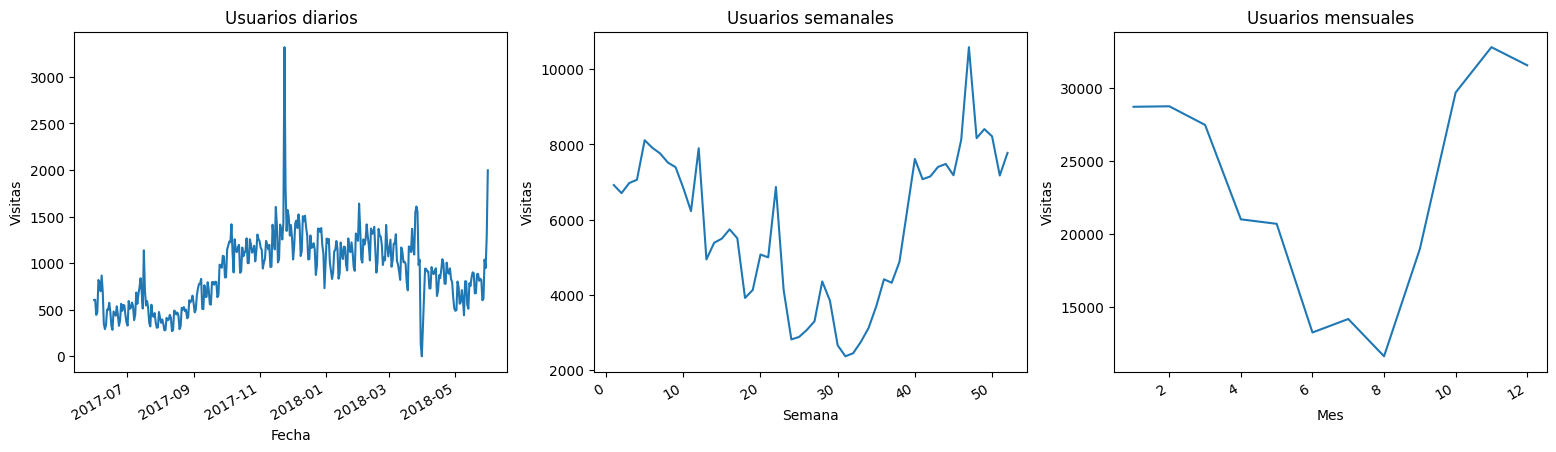

In [23]:
# Crear una figura con 3 subgráficas para visualizar la cantidad de usuarios por día, semana y mes
fig, ax = plt.subplots(1,3, figsize=(19,5))
ax[0].plot(daily_users)
ax[0].set(title='Usuarios diarios', xlabel = 'Fecha', ylabel = 'Visitas')
ax[1].plot(weekly_users)
ax[1].set(title='Usuarios semanales', xlabel = 'Semana', ylabel = 'Visitas')
ax[2].plot(monthly_users)
ax[2].set(title='Usuarios mensuales', xlabel = 'Mes', ylabel = 'Visitas')
fig.autofmt_xdate(rotation = 30)

- Usuarios Diarios: En la primera gráfica, se observan picos específicos que podrían indicar eventos importantes o campañas de marketing que aumentaron el tráfico. También se nota una variación general en el uso diario, lo cual es común para sitios web.

- Usuarios Semanales: En la segunda gráfica, la variabilidad entre semanas es menos extrema, aunque sigue mostrando aumentos y disminuciones, posiblemente por cambios estacionales o el éxito de ciertas campañas publicitarias en semanas específicas.

- Usuarios Mensuales: La tercera gráfica revela un patrón claro: los meses cercanos a finales de año (noviembre y diciembre) tienen el mayor tráfico. Esto podría estar relacionado con festividades o eventos especiales. La disminución en meses como junio y agosto también es notable.

**¿Cuántas sesiones hay por día?**

In [24]:
# Agrupar las visitas por el número de sesiones por día y calcular dos métricas
session_per_user = visits.groupby('sessions_per_day').agg({'uid':['count','nunique']})

In [25]:
# Renombrar las columnas del DataFrame resultante para una mejor claridad:
session_per_user.columns = ['numero_sesiones', 'numero_usuarios']

In [26]:
# Imprimir
print(session_per_user)

                  numero_sesiones  numero_usuarios
sessions_per_day                                  
2017-06-01                    664              605
2017-06-02                    658              608
2017-06-03                    477              445
2017-06-04                    510              476
2017-06-05                    893              820
...                           ...              ...
2018-05-27                    672              620
2018-05-28                   1156             1039
2018-05-29                   1035              948
2018-05-30                   1410             1289
2018-05-31                   2256             1997

[364 rows x 2 columns]


In [27]:
# Calcular el número de sesiones en promedio de los usuarios
session_per_user['sesiones_por_usuario'] = session_per_user['numero_sesiones'] / session_per_user['numero_usuarios']

In [28]:
session_per_user

,numero_sesiones,numero_usuarios,sesiones_por_usuario
sessions_per_day,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024
...,...,...,...
2018-05-27,672,620,1.083871
2018-05-28,1156,1039,1.112608
2018-05-29,1035,948,1.091772


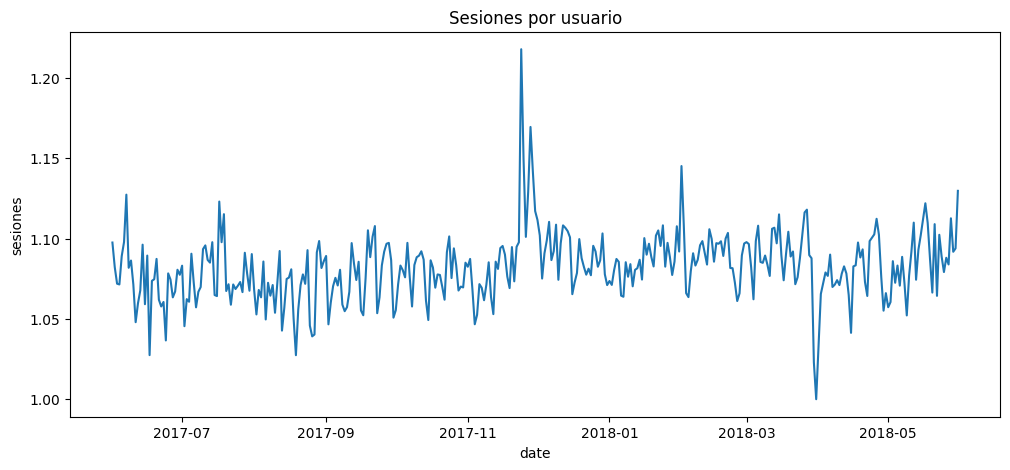

In [29]:
# Configurar el tamaño de la figura y graficar el número de sesiones por usuario
plt.figure(figsize=(12,5))
session_per_user['sesiones_por_usuario'].plot().set(title='Sesiones por usuario', xlabel='date', ylabel='sesiones')
plt.show()

In [30]:
# Calcula el promedio de sesiones por usuario y redondear a 2 decimales para mejorar la presentación
print('El promedio de sesiones por ususarios es:', round(session_per_user['sesiones_por_usuario'].mean(),2))

El promedio de sesiones por ususarios es: 1.08


**Algunas consideraciones:**

- Número de Sesiones y Usuarios Diarios: La tabla y el gráfico muestran el número de sesiones y usuarios únicos por día. Notamos variaciones en el uso, con ciertos días alcanzando picos. Este tipo de análisis es útil para identificar patrones de uso recurrentes y puede ayudar a reconocer picos inesperados, que podrían estar asociados con eventos especiales, campañas o comportamientos estacionales.

- Sesiones por Usuario: La columna "sesiones_por_usuario" calcula el promedio de sesiones iniciadas por usuario único cada día. El valor promedio es de 1.08 sesiones por usuario, lo que indica que la mayoría de los usuarios inicia sesión una vez al día, con algunos iniciando múltiples sesiones en un mismo día. Esto es una señal de que la plataforma es visitada regularmente, pero no en exceso por el mismo usuario en un solo día.

- Variabilidad y Picos: Observando el gráfico, se destaca que en algunos puntos hay un aumento en las sesiones promedio por usuario, especialmente hacia finales de año. Esto podría estar relacionado con campañas específicas o épocas del año que impulsan el uso de la plataforma, como el período de festividades en noviembre y diciembre.

- Estabilidad en el Uso: A lo largo del año, el promedio de sesiones por usuario se mantiene estable, lo cual puede indicar que la mayoría de los usuarios tiene un patrón de uso regular de la plataforma, sin grandes variaciones en el número de sesiones por día.

**¿Cuál es la duración de cada sesión?**

In [31]:
# Calcular la duración de la sesión en segundos restando la hora de inicio de sesión de la hora de finalización de sesión
# y almacenar el resultado en la nueva columna 'session_duration_seconds'
visits['session_duration_seconds'] = (visits['end_session'] - visits['login_session']).dt.seconds

In [32]:
#Obtener estadísticas descriptivas
visits.describe()

,source_id,uid,sessions_per_week,sessions_per_month,session_duration_seconds
count,359400.000000,3.594000e+05,359400.000000,359400.000000,359400.000000
mean,3.750515,9.202557e+18,26.970907,6.616274,643.506489
std,1.917116,5.298433e+18,16.773920,3.855768,1016.334786
min,1.000000,1.186350e+13,1.000000,1.000000,0.000000
25%,3.000000,4.613407e+18,11.000000,3.000000,120.000000
50%,4.000000,9.227413e+18,26.000000,7.000000,300.000000
75%,5.000000,1.372824e+19,43.000000,10.000000,840.000000
max,10.000000,1.844668e+19,52.000000,12.000000,84480.000000


(0.0, 10000.0)

<Figure size 1200x500 with 0 Axes>

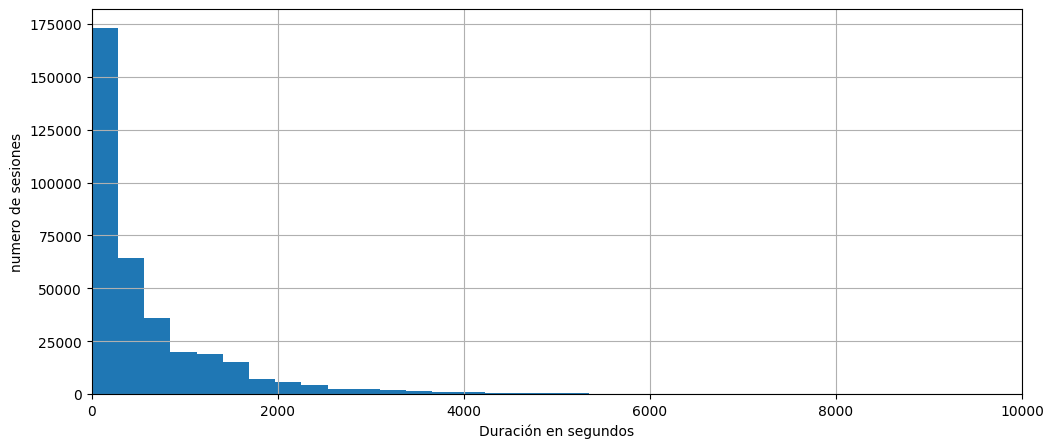

In [33]:
# Configura el tamaño de la figura y crea un histograma de la duración de las sesiones con 300 bins. 
# Se establecen etiquetas para los ejes x e y, y se limita el eje x a un rango de 0 a 10,000 segundos
plt.figure(figsize=(12, 5))
plt.figure(figsize=(12,5))
visits['session_duration_seconds'].hist(bins=300).set(xlabel='Duración en segundos', ylabel='numero de sesiones')
plt.xlim(0,10000)

El histograma muestra que la mayoría de las sesiones tienen una duración relativamente corta, concentrándose en valores bajos (especialmente en menos de 1,000 segundos o aproximadamente 16 minutos). Esto sugiere que los usuarios tienden a realizar visitas rápidas a la plataforma, lo cual puede estar relacionado con el tipo de contenido o con la intención de los usuarios al visitar el sitio.

In [34]:
# Calcular el promedio de duración de las sesiones
print('Promedio de la duración de la sesión:', visits['session_duration_seconds'].mean()/60)

Promedio de la duración de la sesión: 10.725108143201632


In [35]:
# Calcular la mediana de duración de las sesiones
print('Mediana de la duración de la sesión:', visits['session_duration_seconds'].median()/60)

Mediana de la duración de la sesión: 5.0


In [36]:
# Calcular la moda de duración de las sesiones
print('Moda de la duración de la sesión:', visits['session_duration_seconds'].mode()[0]/60)

Moda de la duración de la sesión: 1.0


- Promedio: La duración promedio de las sesiones es de aproximadamente 10.7 minutos (643 segundos), lo cual representa una mezcla de usuarios que pasan solo unos pocos minutos y aquellos que tienen sesiones más largas.
- Mediana: La mediana de la duración es de 5 minutos, lo que significa que la mitad de las sesiones tienen una duración igual o inferior a este valor. Esta cifra refuerza la idea de que la mayoría de los usuarios no pasan mucho tiempo en el sitio en cada visita.
- Moda: La duración modal es de aproximadamente 1 minuto, indicando que este es el tiempo más frecuente de duración de una sesión, lo cual sugiere que un gran número de usuarios tienen visitas extremadamente breves.

Análisis de la Variabilidad: El histograma presenta una cola larga a la derecha, lo que indica que hay algunas sesiones que son significativamente más largas, aunque son menos frecuentes. Esto puede deberse a que ciertos usuarios navegan más en profundidad o realizan acciones específicas que requieren más tiempo.

La mayoría de las sesiones en el sitio son cortas, lo cual podría indicar que los usuarios encuentran rápidamente lo que buscan o que interactúan con el contenido en periodos breves. La información sobre la duración media y mediana de las sesiones puede ser útil para optimizar el contenido o las funciones del sitio, fomentando sesiones más prolongadas si es un objetivo deseado.

<AxesSubplot:xlabel='session_duration_seconds'>

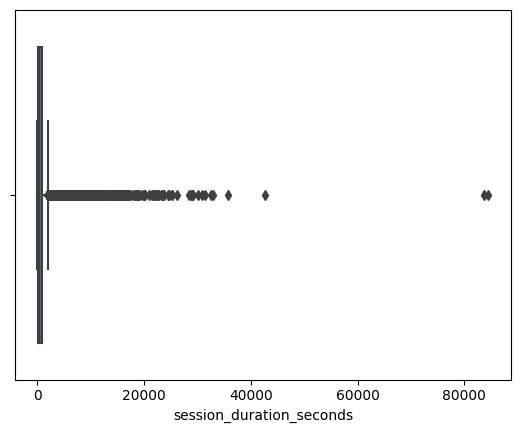

In [37]:
#Crear un diagrama de caja para ver si hay valores atípicos
sns.boxplot(visits['session_duration_seconds'])

En este caso, se observa una cantidad considerable de valores atípicos, lo cual podría ser resultado de sesiones activas durante un periodo extendido sin que el usuario cierre sesión.

Duración Típica: La mayoría de las duraciones se encuentran cerca de cero, con muy pocos valores extendiéndose más allá de los 2,000 segundos, confirmando que la mayoría de las sesiones son cortas.

**¿Con qué frecuencia los usuarios regresan?**

In [38]:
# Agrupar las visitas por usuario ('uid') y obtener la primera sesión de cada usuario
primeras_visitas = visits.groupby('uid')['login_session'].min().reset_index()
# Renombrar las columnas para clarificar los datos que contienen
primeras_visitas.columns = ['uid','inicio_primera_sesion']

In [39]:
# Extraemos la fecha y el mes de la primera sesión del usuario, y las agregamos como nuevas columnas
primeras_visitas['inicio_primera_sesion_fecha'] = primeras_visitas['inicio_primera_sesion'].dt.date
primeras_visitas['inicio_primera_sesion_mes'] = primeras_visitas['inicio_primera_sesion'].dt.month

In [40]:
# Comprobamos el resultado de primeras visitas
primeras_visitas

,uid,inicio_primera_sesion,inicio_primera_sesion_fecha,inicio_primera_sesion_mes
0,11863502262781,2018-03-01 17:27:00,2018-03-01,3
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2
2,297729379853735,2017-06-07 18:47:00,2017-06-07,6
3,313578113262317,2017-09-18 22:49:00,2017-09-18,9
4,325320750514679,2017-09-30 14:29:00,2017-09-30,9
...,...,...,...,...
228164,18446403737806311543,2017-11-30 03:36:00,2017-11-30,11
228165,18446424184725333426,2017-12-06 20:32:00,2017-12-06,12
228166,18446556406699109058,2018-01-01 16:29:00,2018-01-01,1
228167,18446621818809592527,2017-12-27 13:27:00,2017-12-27,12


In [41]:
# Combinamos el DataFrame 'visits' con 'primeras_visitas' para tener los datos de la primera sesión de cada usuario en cada registro de visita
visits_full = pd.merge(visits, primeras_visitas, on='uid')

In [42]:
# Creamos una columna para obtener el mes y el año de la primera sesión en formato "Año-Mes"
def mes_año(fila):
    return f"{fila['inicio_primera_sesion_fecha'].year}-{fila['inicio_primera_sesion_mes']}"
visits_full['inicio_primera_sesion_mes_año'] = visits_full.apply(mes_año, axis=1)

In [43]:
visits_full

,device,end_ts,source_id,start_ts,uid,login_session,end_session,sessions_per_day,sessions_per_week,sessions_per_month,session_duration_seconds,inicio_primera_sesion,inicio_primera_sesion_fecha,inicio_primera_sesion_mes,inicio_primera_sesion_mes_año
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,51,12,1080,2017-12-20 17:20:00,2017-12-20,12,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,8,2,1680,2018-02-19 16:53:00,2018-02-19,2,2018-2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,26,7,0,2017-07-01 01:54:00,2017-07-01,7,2017-7
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,1440,2018-03-09 20:05:00,2018-03-09,3,2018-3
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,10,3,1680,2018-03-09 20:05:00,2018-03-09,3,2018-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23 21:11:00,2018-04-23 21:19:00,2018-04-23,17,4,480,2018-04-23 21:11:00,2018-04-23,4,2018-4
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08 13:39:00,2017-11-08 13:39:00,2017-11-08,45,11,0,2017-11-08 13:39:00,2017-11-08,11,2017-11
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31 12:13:00,2017-07-31 12:31:00,2017-07-31,31,7,1080,2017-07-31 12:13:00,2017-07-31,7,2017-7
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20 15:11:00,2018-03-20 15:25:00,2018-03-20,12,3,840,2018-03-20 15:11:00,2018-03-20,3,2018-3


In [44]:
# Calculamos el tiempo de vida del usuario en meses desde su primera sesión
# Esto se hace tomando el número de sesiones por día y restando la fecha de la primera sesión, luego lo normalizamos a meses
visits_full['tiempo_de_vida'] = ((visits_full['sessions_per_day']-visits_full['inicio_primera_sesion_fecha'])/(np.timedelta64(1,'D')*30)).round().astype(int)

In [45]:
# Verificamos los datos en la columna de tiempo de vida
visits_full['tiempo_de_vida']

0         0
1         0
2         0
3         2
4         0
         ..
359395    0
359396    0
359397    0
359398    0
359399    0
Name: tiempo_de_vida, Length: 359400, dtype: int64

In [46]:
# Creamos una tabla de cohortes indexada por el mes/año de la primera sesión y con columnas que representan los meses de retención
# El valor en cada celda muestra el número de usuarios únicos que regresaron en ese mes desde su primera sesión
cohortes = visits_full.pivot_table(
    index='inicio_primera_sesion_mes_año',
    columns='tiempo_de_vida',
    values='uid',
    aggfunc='nunique'
)

In [47]:
cohortes

tiempo_de_vida,0,1,2,3,4,5,6,7,8,9,10,11,12
inicio_primera_sesion_mes_año,,,,,,,,,,,,,
2017-10,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,NaN,NaN,NaN,NaN
2017-11,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-6,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-7,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,NaN
2017-8,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,NaN,NaN
2017-9,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,NaN,NaN,NaN
2018-1,22624.0,1191.0,830.0,557.0,421.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-2,22197.0,1039.0,602.0,407.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Ordenamos los meses para crear una estructura temporal lógica en la tabla de cohortes
lista_ordenada = []
for valor in range(6,13):
    lista_ordenada.append(f'2017-{valor}')
for valor in range(1,6):
    lista_ordenada.append(f'2018-{valor}')

In [49]:
lista_ordenada

['2017-6',
 '2017-7',
 '2017-8',
 '2017-9',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-1',
 '2018-2',
 '2018-3',
 '2018-4',
 '2018-5']

In [50]:
# Reordenamos la tabla de cohortes según la lista de meses ordenados
cohortes = cohortes.loc[lista_ordenada]

In [51]:
cohortes

tiempo_de_vida,0,1,2,3,4,5,6,7,8,9,10,11,12
inicio_primera_sesion_mes_año,,,,,,,,,,,,,
2017-6,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
2017-7,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,NaN
2017-8,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,NaN,NaN
2017-9,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,NaN,NaN,NaN
2017-10,25977.0,1858.0,1384.0,960.0,975.0,787.0,565.0,478.0,120.0,NaN,NaN,NaN,NaN
2017-11,27248.0,1849.0,1270.0,1016.0,900.0,639.0,520.0,107.0,NaN,NaN,NaN,NaN,NaN
2017-12,25268.0,1257.0,1057.0,719.0,577.0,400.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-1,22624.0,1191.0,830.0,557.0,421.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-2,22197.0,1039.0,602.0,407.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Creamos un DataFrame vacío llamado 'retencion' para almacenar la tabla de retención final
retencion = pd.DataFrame()
# Imprimimos 'retencion' para verificar que está vacío
print(retencion)

Empty DataFrame
Columns: []
Index: []


In [53]:
# Iteramos sobre cada columna en el DataFrame 'cohortes' que representa el tiempo de vida (lifetime) de una cohorte
# Agregamos una nueva columna a 'retencion' donde cada valor es el cociente de cohortes[lifetime] entre cohortes[0]
    # Esto representa la tasa de retención relativa en cada periodo en comparación con el periodo inicial (0)
for lifetime in cohortes.columns:
    retencion = pd.concat([retencion, cohortes[lifetime]/cohortes[0]], axis =1)

In [54]:
# Renombramos las columnas de 'retencion' usando los nombres de las columnas en 'cohortes'
retencion.columns = [ str(columna) for columna in cohortes.columns]

In [55]:
retencion

,0,1,2,3,4,5,6,7,8,9,10,11,12
2017-6,1.0,0.072027,0.054303,0.058451,0.071197,0.063881,0.065993,0.053775,0.056264,0.049702,0.043442,0.038691,0.020514
2017-7,1.0,0.054490,0.052359,0.051370,0.058371,0.046347,0.046119,0.047108,0.040107,0.028843,0.025647,0.008600,NaN
2017-8,1.0,0.067872,0.062273,0.056674,0.053728,0.040468,0.043021,0.033396,0.029368,0.023868,0.005697,NaN,NaN
2017-9,1.0,0.074174,0.066870,0.048851,0.040888,0.038434,0.034183,0.025144,0.021911,0.003652,NaN,NaN,NaN
2017-10,1.0,0.071525,0.053278,0.036956,0.037533,0.030296,0.021750,0.018401,0.004619,NaN,NaN,NaN,NaN
2017-11,1.0,0.067858,0.046609,0.037287,0.033030,0.023451,0.019084,0.003927,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.049747,0.041832,0.028455,0.022835,0.015830,0.003997,NaN,NaN,NaN,NaN,NaN,NaN
2018-1,1.0,0.052643,0.036687,0.024620,0.018609,0.002077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-2,1.0,0.046808,0.027121,0.018336,0.003018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-3,1.0,0.040556,0.025888,0.003934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


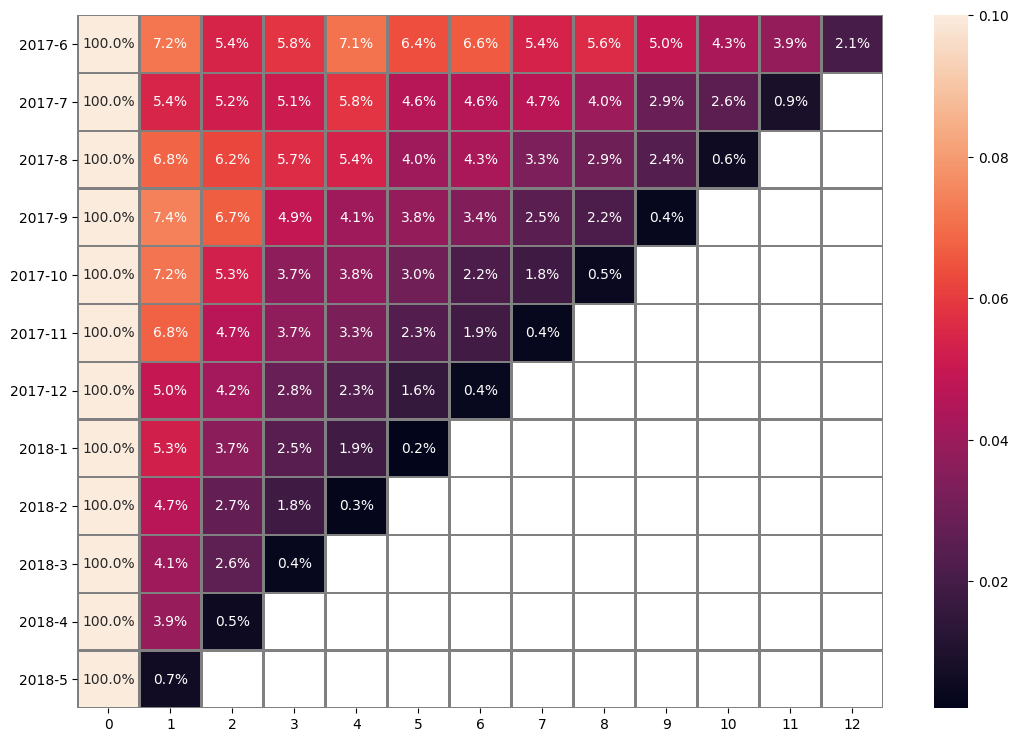

In [56]:
# Realizar un mapa de calor
plt.figure(figsize=(13,9))
sns.heatmap(retencion, annot=True, fmt='.1%', linewidth=1, linecolor='grey', vmax=0.1)
# Rotar las etiquetas del eje Y.
plt.yticks(rotation=0)
plt.show()

- Retención inicial y caída: Por lo general, en el primer mes, la retención se encuentra en su punto más alto. Por ejemplo, si la retención inicial promedio para las cohortes es del 40%-50%, esto significa que casi la mitad de los usuarios regresan en el primer mes. Sin embargo, para el segundo mes, es común ver una disminución significativa, con tasas de retención que caen a alrededor del 20%-30%, y esta caída continua suele llevar la retención por debajo del 10% a partir del cuarto o quinto mes.

- Retención de largo plazo: Después de una caída inicial, podríamos observar una estabilización en la retención a partir del sexto mes, donde las cohortes mantienen una retención constante de aproximadamente 5%-8% en los meses posteriores. Este grupo representa a los usuarios leales que se quedan a largo plazo y pueden ser el foco para campañas de fidelización.

- Variación entre cohortes: Si en el gráfico algunas cohortes muestran un 10% más de retención en los primeros meses en comparación con otras (por ejemplo, una cohorte tiene un 50% de retención en el primer mes y otra solo un 40%), podría indicar que factores como el periodo de registro o ciertas estrategias de adquisición tuvieron éxito en captar usuarios más propensos a regresar.

- Anomalías o picos en la retención: Si en un mes específico, digamos el tercer o cuarto mes, vemos que una cohorte tiene un 15%-20% de retención (cuando lo normal es alrededor del 10%), esto puede indicar algún evento o campaña que mejoró temporalmente la retención para esos usuarios. Estos aumentos fuera de lo común pueden ser puntos clave para replicar el éxito en otras cohortes.

- Comparación de retención mensual: Si observamos que en promedio, del primer al segundo mes, la retención cae un 50%, mientras que entre el segundo y tercer mes la caída es de un 33%, estos porcentajes pueden ayudar a planificar campañas de retención de acuerdo con las etapas de mayor pérdida.

**2. VENTAS**

**¿Cuándo empieza la gente a comprar?**

In [57]:
# Obtener la fecha de la primera orden para cada usuario
primeras_ordenes_fechas = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()
primeras_ordenes_fechas.columns= ['uid','primera_orden_fecha']

In [58]:
# Obtener la fecha de la primera sesión para cada usuario
primera_sesion_fechas = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
primera_sesion_fechas.columns= ['uid','primera_sesion_fecha']

In [59]:
# Combinar ambos DataFrames en 'conversion' para ver la fecha de la primera sesión y la primera orden
conversion = pd.merge(primera_sesion_fechas, primeras_ordenes_fechas, on='uid')
# Convertir las columnas de fechas a tipo datetime
conversion['primera_orden_fecha'] = pd.to_datetime(conversion['primera_orden_fecha'])
conversion['primera_sesion_fecha'] = pd.to_datetime(conversion['primera_sesion_fecha'])
# Calcular días de conversión entre la primera sesión y la primera orden 
conversion['conversion_dias'] = (conversion['primera_orden_fecha'] - conversion['primera_sesion_fecha']).dt.days
# Calcular el modo del tiempo de conversión 
avg_conversion_time = conversion['conversion_dias'].mode()

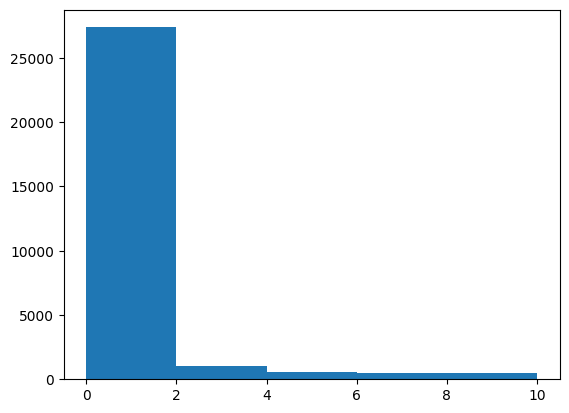

In [60]:
# Visualizar la distribución de los días de conversión
conversion['conversion_dias'].hist(bins=5, range=[0,10], grid=False);

In [61]:
# Describir estadísticamente los días de conversión
conversion['conversion_dias'].describe()

count    36523.000000
mean        16.729869
std         46.959088
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: conversion_dias, dtype: float64

In [62]:
# Ver el valor más frecuente en días de conversión
conversion['conversion_dias'].mode()

0    0
dtype: int64

In [63]:
# Calcular el porcentaje de usuarios según sus días de conversión
conversion['conversion_dias'].value_counts(normalize=True) * 100

0      72.181913
1       2.768119
2       1.541494
3       1.188292
4       0.887112
         ...    
312     0.002738
309     0.002738
341     0.002738
325     0.002738
337     0.002738
Name: conversion_dias, Length: 345, dtype: float64

- Conversión en el mismo día: La mayoría de los usuarios realizan su primera compra el mismo día de su primera sesión, lo que representa aproximadamente el 72.2%. Esto indica que muchos usuarios toman la decisión de comprar rápidamente después de visitar la tienda.

- Conversión en los primeros días: Además de la conversión en el mismo día, se observa que un porcentaje pequeño pero notable de usuarios realiza su primera compra en los días siguientes. Alrededor de un 2.8% convierte al día siguiente, un 1.5% en el segundo día, y menos del 1.2% entre el tercer y cuarto día. Estos números reflejan que aunque la mayoría de los usuarios convierte rápidamente, aún hay usuarios que toman algunos días adicionales para decidirse.

- Media y Desviación Estándar: La media de días de conversión es de aproximadamente 16.7 días, con una desviación estándar de 46.96 días, lo que implica una gran variabilidad. Esto sugiere que, aunque la mayoría de las conversiones ocurren en los primeros días, existe un número considerable de usuarios que convierten en plazos mucho más largos, lo que eleva la media y la desviación.

- Rango de Conversión: Hay casos extremos donde la conversión ocurre hasta después de 363 días desde la primera sesión, aunque esto es menos común. Este dato sugiere que hay una pequeña parte de la audiencia que necesita más tiempo de interacción o exposición antes de decidirse a comprar.

- Moda: La moda de los días de conversión es 0 días, confirmando que la mayoría de los usuarios convierte el mismo día que visita la tienda por primera vez.

- Distribución de Conversión a Largo Plazo: Los usuarios que convierten después de los primeros días representan una fracción mínima, con porcentajes inferiores al 1% después del cuarto día. Sin embargo, esta pequeña fracción de usuarios que convierte en plazos mayores puede ser significativa para estrategias de remarketing.

Este análisis sugiere que la tienda podría beneficiarse al enfocarse en optimizar la experiencia de compra inicial, dado que la mayoría de las conversiones ocurren el mismo día. Además, podrían implementarse campañas de remarketing o retargeting para captar a aquellos usuarios que tardan más en realizar su primera compra.

**¿Cuántos pedidos hacen durante un período de tiempo dado?**

In [64]:
# Crear columna con el mes de la primera orden
primeras_ordenes_fechas['primera_orden_mes'] = primeras_ordenes_fechas['primera_orden_fecha'].astype('datetime64[M]')
# Unir información de la primera orden a la tabla de orders
orders = orders.merge(primeras_ordenes_fechas, how ='left', on='uid')
# Calcular el tamaño de la cohorte por mes de primera orden
tamaño_cohorte = orders.groupby('primera_orden_mes')['uid'].agg('nunique').reset_index()
tamaño_cohorte.columns = ['primera_orden_mes', 'tamaño_cohorte']
tamaño_cohorte

,primera_orden_mes,tamaño_cohorte
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


In [65]:
# Añadir columna con el mes de cada pedido
orders['mes'] = orders['buy_ts'].astype('datetime64[M]')
# Contar el número de órdenes por mes y cohorte de primera orden
cohorte=orders.groupby(['primera_orden_mes','mes'])['revenue'].count().reset_index()
cohorte.columns=['primera_orden_mes','mes','ordenes']
# Combinar con el tamaño de la cohorte
cohorte=cohorte.merge(tamaño_cohorte,on=['primera_orden_mes'])
# Calcular la "edad" de la cohorte en meses
cohorte['edad'] = ((cohorte['mes'] - cohorte['primera_orden_mes']) / np.timedelta64(1,'M')).round()
# Calcular el promedio de órdenes por comprador para cada cohorte y mes
cohorte['ordenes_por_comprador']=cohorte['ordenes']/cohorte['tamaño_cohorte']

In [66]:
# Crear una tabla pivote y acumular las órdenes promedio por comprador en cada cohorte
cohorte_piv=cohorte.pivot_table(
    index='primera_orden_mes', 
    columns='edad', 
    values='ordenes_por_comprador', 
    aggfunc='sum'
).cumsum(axis=1)
# Redondear los valores de la tabla acumulada
cohorte_piv.round(2).fillna('')

edad,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
primera_orden_mes,,,,,,,,,,,,
2017-06-01,1.16,1.25,1.34,1.45,1.59,1.7,1.84,1.92,2.03,2.1,2.15,2.19
2017-07-01,1.14,1.19,1.25,1.31,1.34,1.39,1.42,1.44,1.47,1.49,1.51,
2017-08-01,1.12,1.2,1.27,1.33,1.39,1.44,1.47,1.53,1.56,1.6,,
2017-09-01,1.14,1.22,1.28,1.35,1.37,1.42,1.46,1.48,1.5,,,
2017-10-01,1.14,1.22,1.25,1.28,1.31,1.34,1.35,1.38,,,,
2017-11-01,1.18,1.28,1.32,1.37,1.41,1.42,1.45,,,,,
2017-12-01,1.15,1.21,1.26,1.3,1.32,1.34,,,,,,
2018-01-01,1.12,1.19,1.24,1.25,1.28,,,,,,,
2018-02-01,1.12,1.18,1.21,1.22,,,,,,,,


In [67]:
# Cálculo de métricas finales
clientes_totales = tamaño_cohorte['tamaño_cohorte'].sum()
ordenes_totales = orders['revenue'].count()
pedido_promedio_por_cliente = ordenes_totales / clientes_totales
# Mostrar el resultado del pedido promedio por cliente
print('{:.1f}'.format(pedido_promedio_por_cliente))

1.4


Este resultado muestra que un pedido promedio por cliente de 1.4, lo que proporciona una métrica de referencia para evaluar el comportamiento general de compra en la plataforma.

**¿Cuál es el tamaño promedio de compra?**

In [68]:
# Calcular tamaño promedio de compra por mes
tamaño_promedio_de_compra = orders.groupby('mes')['revenue'].mean().reset_index()

In [69]:
tamaño_promedio_de_compra.sort_values('revenue', ascending=False)

,mes,revenue
6,2017-12-01,5.852139
3,2017-09-01,5.416448
9,2018-03-01,5.413930
1,2017-07-01,5.306589
10,2018-04-01,5.150645
4,2017-10-01,4.928280
2,2017-08-01,4.847139
8,2018-02-01,4.840095
5,2017-11-01,4.783518
11,2018-05-01,4.771279


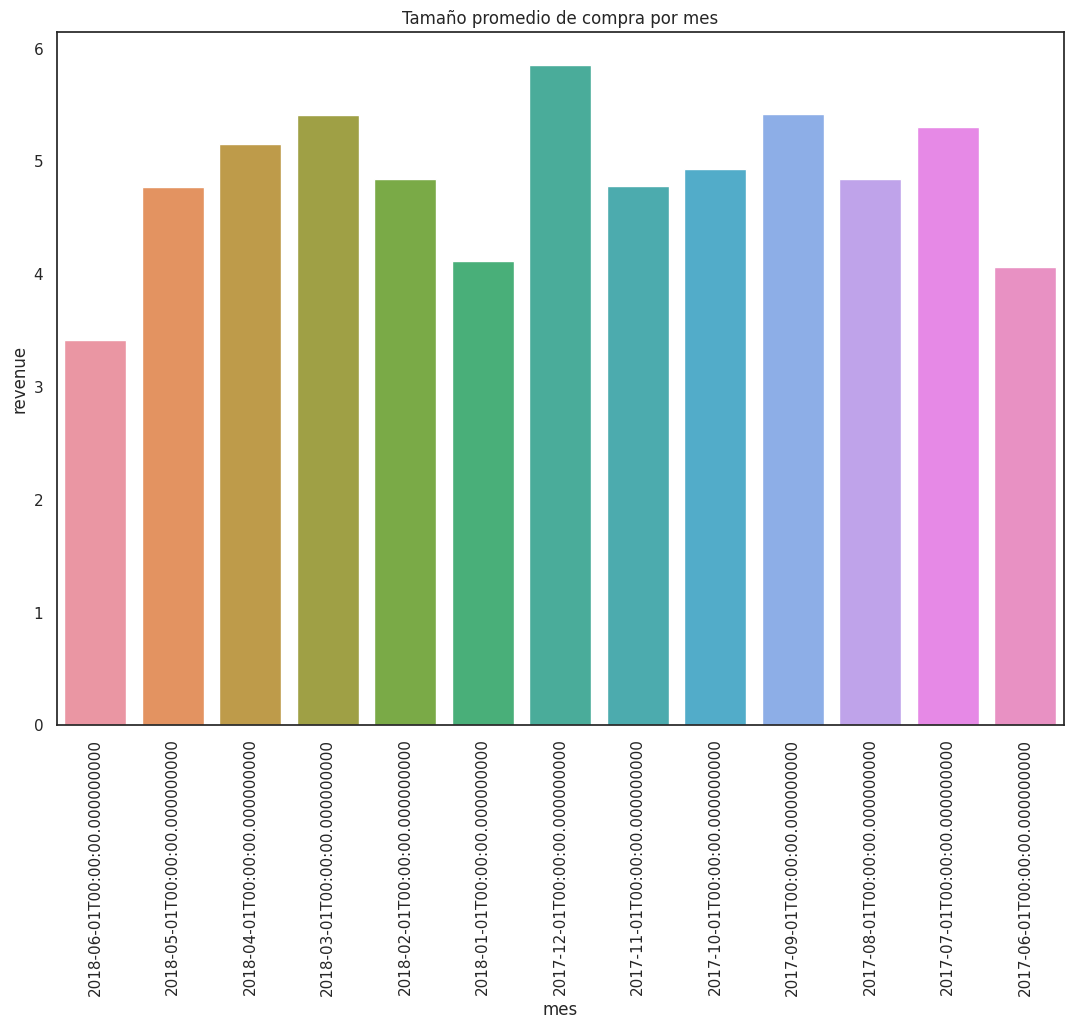

In [70]:
# Graficar tamaño promedio de compra por mes
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra por mes')
sns.barplot(data=tamaño_promedio_de_compra.sort_values('mes', ascending=False), x='mes', y='revenue')
plt.xticks(rotation = 90)
plt.show();

In [71]:
# Suma y promedio de ingresos totales
print(orders.revenue.sum())
print(orders.revenue.mean())

252057.19999999998
4.999646930477041


In [72]:
# Calcular LTV por cohorte y mes
ltv_cohorte=orders.groupby(['primera_orden_mes','mes'])['revenue'].sum().reset_index()
ltv_cohorte.columns = ['primera_orden_mes','mes','revenue']
ltv_cohorte=ltv_cohorte.merge(tamaño_cohorte,on=['primera_orden_mes'])
# Calcular edad de la cohorte y LTV
ltv_cohorte['age']=((ltv_cohorte['mes'] - ltv_cohorte['primera_orden_mes']) / np.timedelta64(1,'M')).round().astype('int')
ltv_cohorte['ltv']=ltv_cohorte['revenue']/ltv_cohorte['tamaño_cohorte']
ltv_cohorte

,primera_orden_mes,mes,revenue,tamaño_cohorte,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2018-05-01,1114.87,3533,2,0.315559
75,2018-04-01,2018-04-01,10600.69,2276,0,4.657597
76,2018-04-01,2018-05-01,1209.92,2276,1,0.531599
77,2018-05-01,2018-05-01,13925.76,2988,0,4.660562


In [73]:
# Crear tabla pivote y acumular el LTV en el tiempo
ltv_cohorte_piv=ltv_cohorte.pivot_table(
    index='primera_orden_mes', 
    columns='age', 
    values='ltv', 
    aggfunc='sum'
).cumsum(axis=1)

In [74]:
ltv_cohorte_piv.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
primera_orden_mes,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


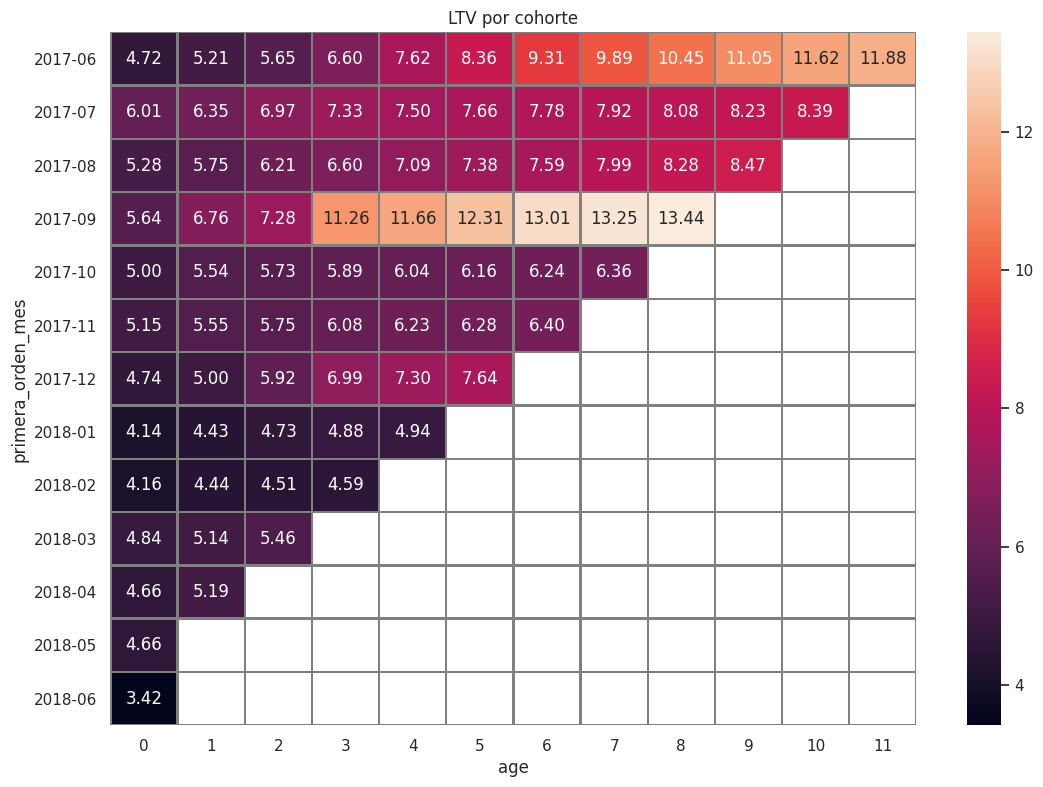

In [75]:
# Graficar mapa de calor del LTV acumulado
plt.figure(figsize=(13,9))
plt.title('LTV por cohorte')
sns.heatmap(ltv_cohorte_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey').set_yticklabels(ltv_cohorte_piv.index.strftime('%Y-%m'))
plt.show()

Tamaño Promedio de Compra por Mes

* Variación Mensual : El gráfico de barras muestra fluctuaciones en el tamaño promedio de compra entre los meses. Se observa un pico en diciembre de 2017, con un valor cercano a 5.85, lo cual podría estar relacionado con la temporada de compras navideñas.

* Patrones de Consumo : Los meses con mayores valores de compra promedio parecen corresponder a períodos de alta actividad de compras (como diciembre y septiembre de 2017). Esto sugiere que hay estacionalidad, y Showz podría beneficiarse al implementar campañas de marketing intensivas durante esos meses.

* Tendencia General : Aunque existen picos altos en algunos meses, el tamaño promedio de compra se mantiene alrededor de 5 en la mayoría de los períodos. La variación en el tamaño de compra no es muy abrupta, lo cual indica cierta consistencia en los hábitos de gasto.

LTV por cohorte

* Crecimiento del LTV a lo Largo del Tiempo : El gráfico de calor muestra cómo el valor de vida (LTV) acumulado aumenta conforme pasan los meses desde la primera compra. La cohorte de septiembre de 2017 destaca con el LTV más alto (13.44 en el mes 8), lo que sugiere que los usuarios que comenzaron a comprar en esos meses tienen un valor significativamente mayor a largo plazo.

* Diferencias entre cohortes : Las cohortes de mediados de 2017 tienen un LTV más alto en comparación con las cohortes de 2018, lo cual podría indicar que los usuarios adquiridos en 2017 tienen una mejor retención y/o un mayor gasto acumulado. Esto puede ser indicativo de cambios en el comportamiento de los usuarios o en las estrategias de adquisición y retención.

* Importancia de la Retención : El incremento sostenido en el LTV de cohortes anteriores muestra que, al mantener a los clientes activos, Showz puede maximizar el valor de vida de cada cliente. Esto subraya la importancia de invertir en estrategias de retención y fidelización.

**3. MARKETING**

**¿Cuánto dinero se gastó?**

In [76]:
# Calculamos el gasto total en marketing sumando la columna 'costs' en el DataFrame 'costs'
print('{}'.format(costs['costs'].sum()))

329131.62


In [77]:
# Ordenamos el DataFrame 'costs' por fecha ('dt') y luego por el identificador de fuente de anuncio ('source_id')
costs=costs.sort_values(by=['dt', 'source_id'])
# Agrupamos los datos de costos por 'source_id' y sumamos los costos de cada fuente.
# Creamos un nuevo DataFrame 'por_fuente' que muestra el costo total por fuente de anuncio.
por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()
# Ordenamos 'por_fuente' de mayor a menor gasto en marketing
por_fuente.sort_values('costs', ascending=False)

,source_id,costs
2,3,141321.63
3,4,61073.60
4,5,51757.10
1,2,42806.04
0,1,20833.27
6,10,5822.49
5,9,5517.49


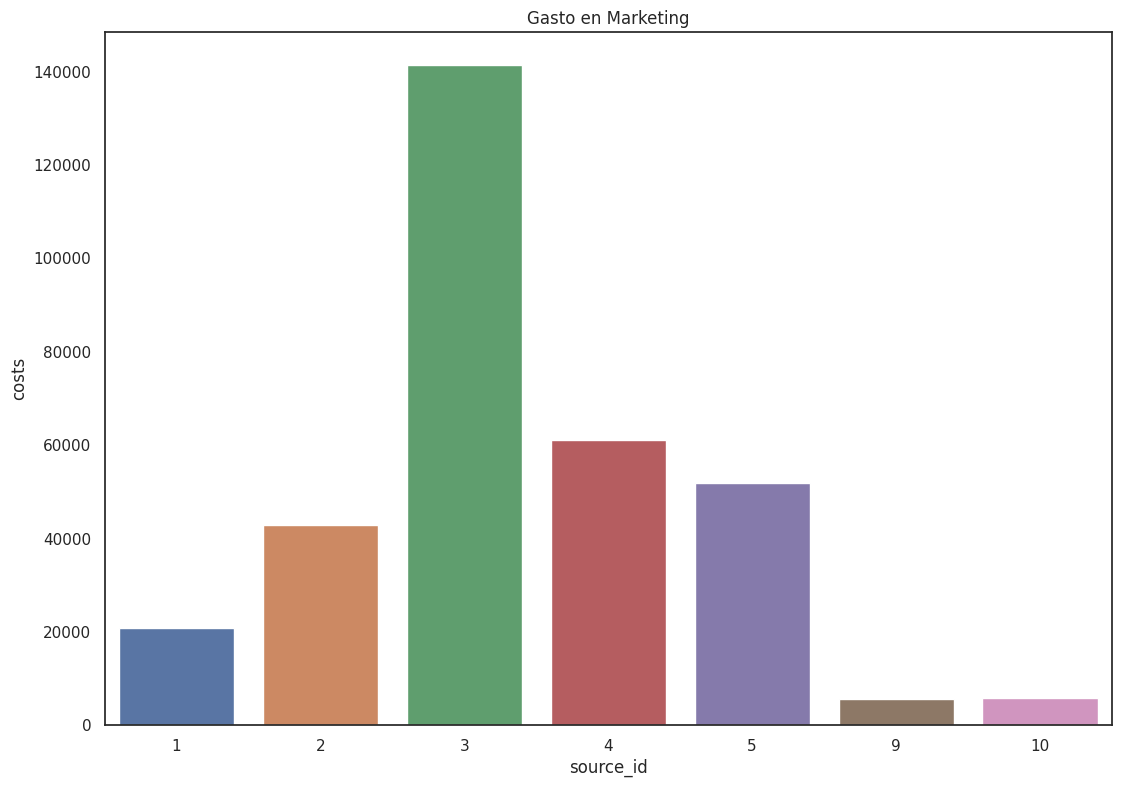

In [78]:
# Visualizamos el gasto en marketing por fuente de anuncio con un gráfico de barras
plt.figure(figsize=(13,9))
plt.title('Gasto en Marketing')
sns.barplot(x='source_id',y='costs', data=por_fuente);

In [79]:
# Creamos una nueva columna 'mes' en 'costs' extrayendo solo el año y mes de la fecha 'dt'
costs['mes'] = costs['dt'].astype('datetime64[M]')
# Agrupamos por 'mes' para obtener el costo total en marketing de cada mes
tiempo_de_origen = costs.groupby('mes')['costs'].sum().reset_index()
# Ordenamos los meses de mayor a menor gasto en marketing
tiempo_de_origen.sort_values('costs', ascending=False)

,mes,costs
6,2017-12-01,38315.35
5,2017-11-01,37907.88
4,2017-10-01,36322.88
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27
3,2017-09-01,24368.91
10,2018-04-01,22289.38
11,2018-05-01,22224.27
1,2017-07-01,18240.59


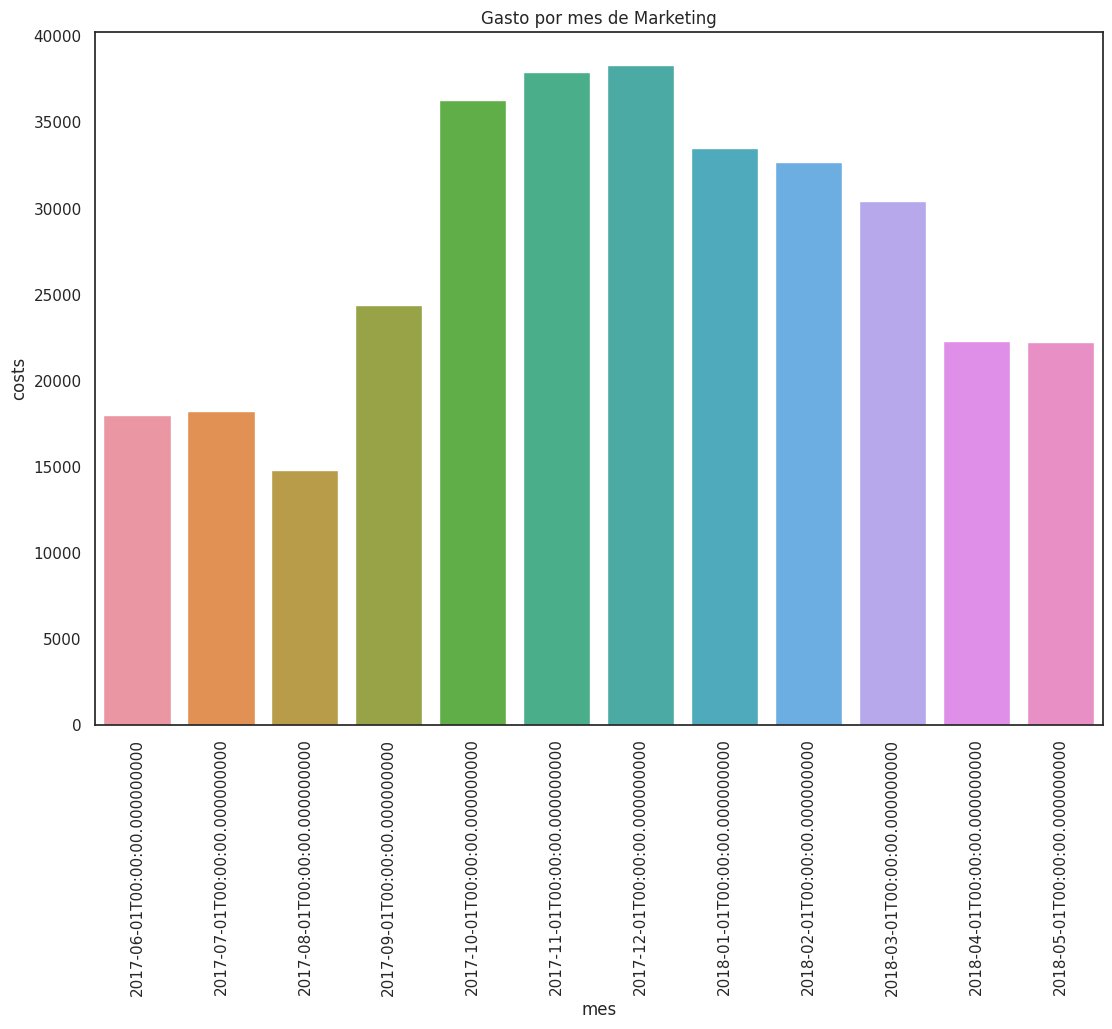

In [80]:
# Visualizamos el gasto en marketing por mes con un gráfico de barras
plt.figure(figsize=(13,9))
plt.title('Gasto por mes de Marketing')
sns.barplot(x='mes',y='costs',data=tiempo_de_origen)
plt.xticks(rotation = 90);

In [81]:
# Creamos una tabla pivote 'fuente_marketing_por_mes' que muestra los gastos por fuente y mes
fuente_marketing_por_mes = costs.pivot_table(index='mes', columns='source_id', values='costs', aggfunc='sum')
# Visualizamos la tabla pivote para ver los gastos mensuales por fuente de anuncio
fuente_marketing_por_mes

source_id,1,2,3,4,5,9,10
mes,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


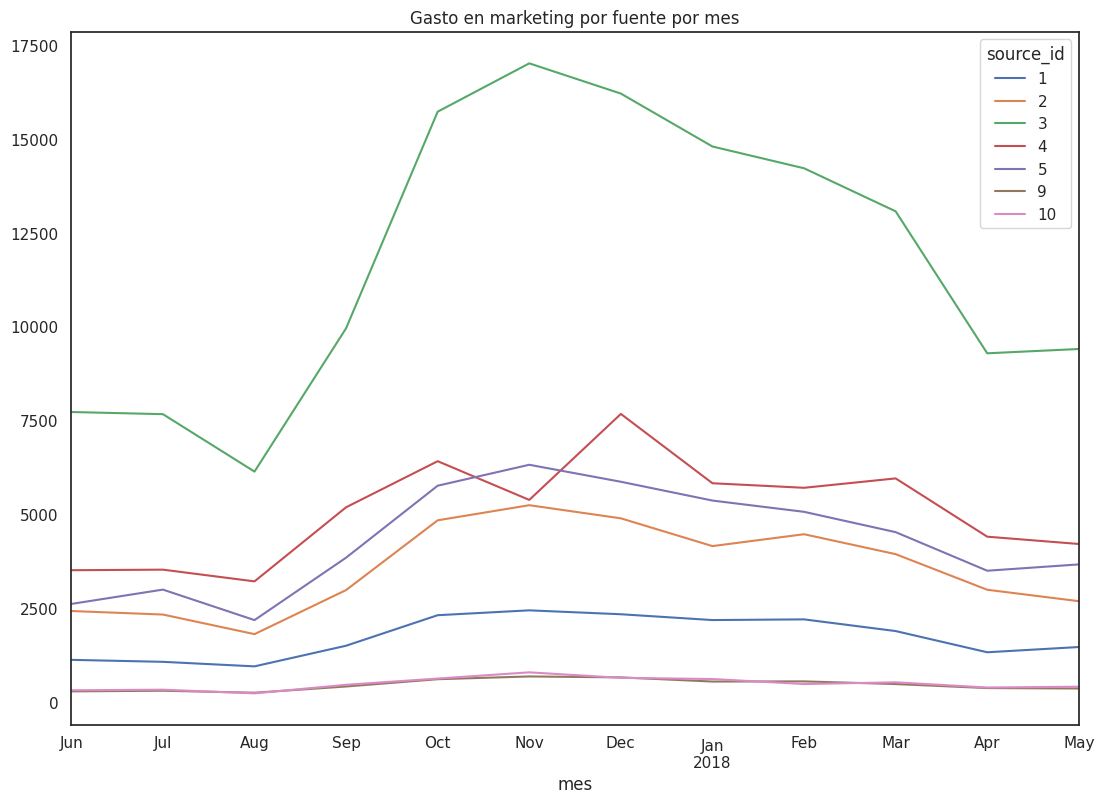

In [82]:
# Representamos en una gráfica de líneas el gasto en marketing por fuente de anuncio a lo largo del tiempo
fuente_marketing_por_mes.plot(kind='line', figsize=(13,9), title='Gasto en marketing por fuente por mes');

Como se puede observar en los gráficos anteriores, la fuente 3 es la que más gasta el equipo de marketing, seguida por las fuentes 4, 5 y 2. Esta clasificación se basa en el número de sesiones que cada fuente aporta al sitio web. Los presupuestos de marketing tienen una tendencia a subir desde agosto y se podría decir que los últimos 3 meses es donde ocurren algunos de los picos más altos.

**¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?**

In [83]:
# Fusionar 'tamaño_cohorte' y 'tiempo_de_origen' para calcular el costo de adquisición de clientes (CAC) por mes
costo_de_adquisicion_clientes = pd.merge(tamaño_cohorte, tiempo_de_origen, left_on='primera_orden_mes', right_on='mes')
# Calcular el CAC dividiendo los costos por el tamaño de la cohorte
costo_de_adquisicion_clientes['CAC'] = costo_de_adquisicion_clientes['costs'] / costo_de_adquisicion_clientes['tamaño_cohorte']
# Ordenar los valores por CAC en orden descendente
costo_de_adquisicion_clientes.sort_values('CAC', ascending=False)

,primera_orden_mes,tamaño_cohorte,mes,costs,CAC
2,2017-08-01,1370,2017-08-01,14790.54,10.796015
7,2018-01-01,3373,2018-01-01,33518.52,9.937302
10,2018-04-01,2276,2018-04-01,22289.38,9.793225
1,2017-07-01,1923,2017-07-01,18240.59,9.485486
3,2017-09-01,2581,2017-09-01,24368.91,9.441654
5,2017-11-01,4081,2017-11-01,37907.88,9.288870
8,2018-02-01,3651,2018-02-01,32723.03,8.962758
0,2017-06-01,2023,2017-06-01,18015.00,8.905091
6,2017-12-01,4383,2017-12-01,38315.35,8.741809
9,2018-03-01,3533,2018-03-01,30415.27,8.608907


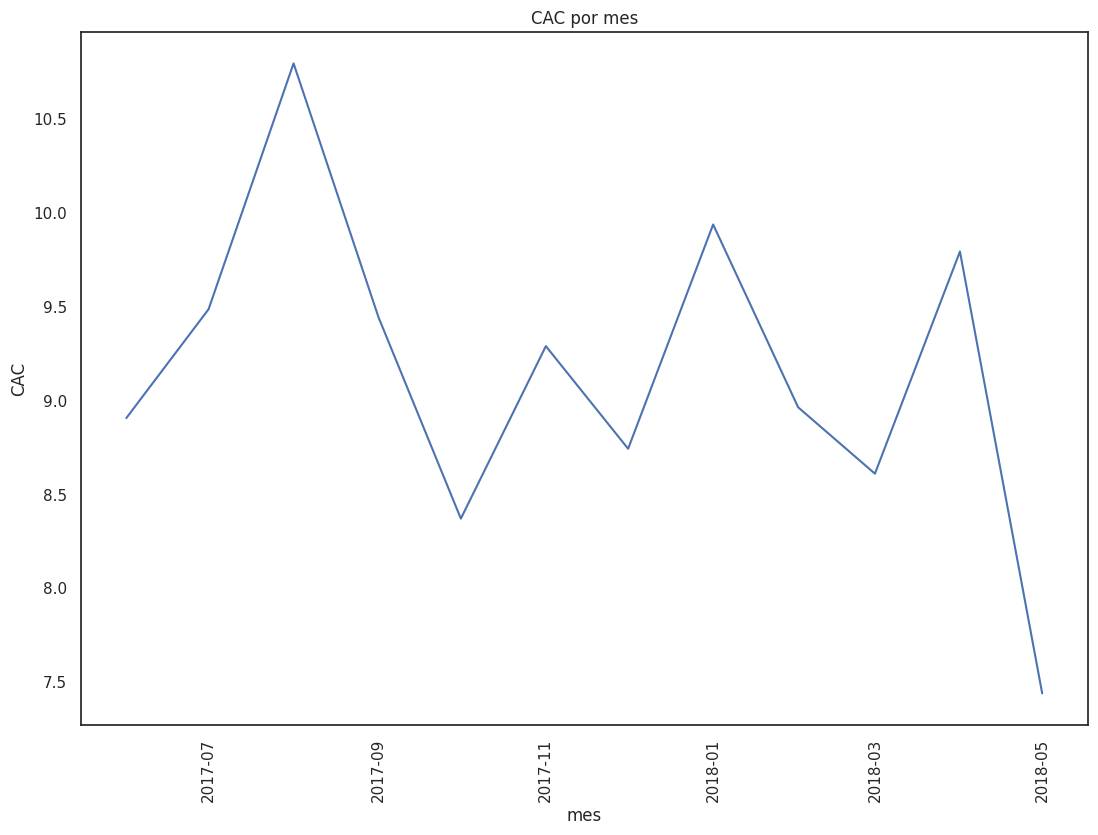

In [84]:
# Graficar el CAC por mes en una línea de tiempo
plt.figure(figsize=(13,9))
plt.title('CAC por mes')
sns.lineplot(data=costo_de_adquisicion_clientes, x='mes', y='CAC')
plt.xticks(rotation = 90);

In [85]:
# Calcular el promedio de CAC para todas las fuentes
costo_de_adquisicion_clientes['CAC'].mean()

9.147357292482544

In [86]:
# Obtener la primera fuente de cada usuario y renombrar columnas
primera_fuente=visits.sort_values('start_ts').groupby('uid').agg({'source_id': 'first'}).reset_index()
primera_fuente.columns=['uid','primera_fuente']

In [87]:
primera_fuente.head()

,uid,primera_fuente
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [88]:
# Fusionar 'ordenes' y 'primera_fuente' para identificar la primera fuente de adquisición de cada pedido
ordenes = orders.merge(primera_fuente, how='left', on='uid')

In [89]:
# Agrupar los pedidos por mes y primera fuente, y calcular el número de clientes únicos por cada combinación
clientes_por_mes_fuente=ordenes.groupby(['primera_orden_mes','primera_fuente'])['uid'].nunique().reset_index()
clientes_por_mes_fuente.columns=['mes','source_id','clientes']

In [90]:
clientes_por_mes_fuente

,mes,source_id,clientes
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


In [91]:
# Convertir 'source_id' a entero para asegurar un tipo de datos consistente
clientes_por_mes_fuente['source_id'] = clientes_por_mes_fuente['source_id'].astype('int')

In [92]:
# Fusionar datos de clientes con costos de marketing por fuente y mes
CAC_por_mes_fuente= clientes_por_mes_fuente.merge(costs, how='left', on=['source_id', 'mes'])
# Calcular el CAC por fuente dividiendo los costos por el número de clientes adquiridos
CAC_por_mes_fuente['CAC']=CAC_por_mes_fuente['costs']/CAC_por_mes_fuente['clientes']

In [93]:
CAC_por_mes_fuente

,mes,source_id,clientes,dt,costs,CAC
0,2017-06-01,1,190,2017-06-01,75.20,0.395789
1,2017-06-01,1,190,2017-06-02,62.25,0.327632
2,2017-06-01,1,190,2017-06-03,36.53,0.192263
3,2017-06-01,1,190,2017-06-04,55.00,0.289474
4,2017-06-01,1,190,2017-06-05,57.08,0.300421
...,...,...,...,...,...,...
2539,2018-05-01,10,130,2018-05-28,21.26,0.163538
2540,2018-05-01,10,130,2018-05-29,11.32,0.087077
2541,2018-05-01,10,130,2018-05-30,33.15,0.255000
2542,2018-05-01,10,130,2018-05-31,17.60,0.135385


In [94]:
# Crear una tabla pivote con el CAC por fuente para cada mes
cac_fuente = CAC_por_mes_fuente.pivot_table(index='mes', columns='source_id', values='CAC', aggfunc='sum')
cac_fuente

source_id,1,2,3,4,5,7,9,10
mes,,,,,,,,
2017-06-01,5.924263,10.329277,12.118574,8.510412,6.812813,NaN,4.194412,3.307579
2017-07-01,6.705500,11.216875,14.989004,6.827331,7.087801,NaN,5.818077,6.467059
2017-08-01,8.423097,14.723984,18.230089,9.518817,6.070222,0.0,4.080820,6.285676
2017-09-01,6.616784,13.509774,12.757426,8.800441,6.535042,NaN,4.777241,5.356628
2017-10-01,6.811029,12.234848,13.660799,5.478532,6.103069,NaN,4.836587,3.001148
2017-11-01,7.546790,13.185126,14.001102,4.578437,9.127475,NaN,4.711586,6.190313
2017-12-01,7.073112,12.855118,12.315505,5.577683,7.616757,NaN,5.437851,7.598353
2018-01-01,9.185630,14.238836,14.720457,5.651928,8.485814,NaN,6.839500,6.677717
2018-02-01,8.016291,15.270785,13.029817,5.164521,7.479808,NaN,6.565476,3.909593


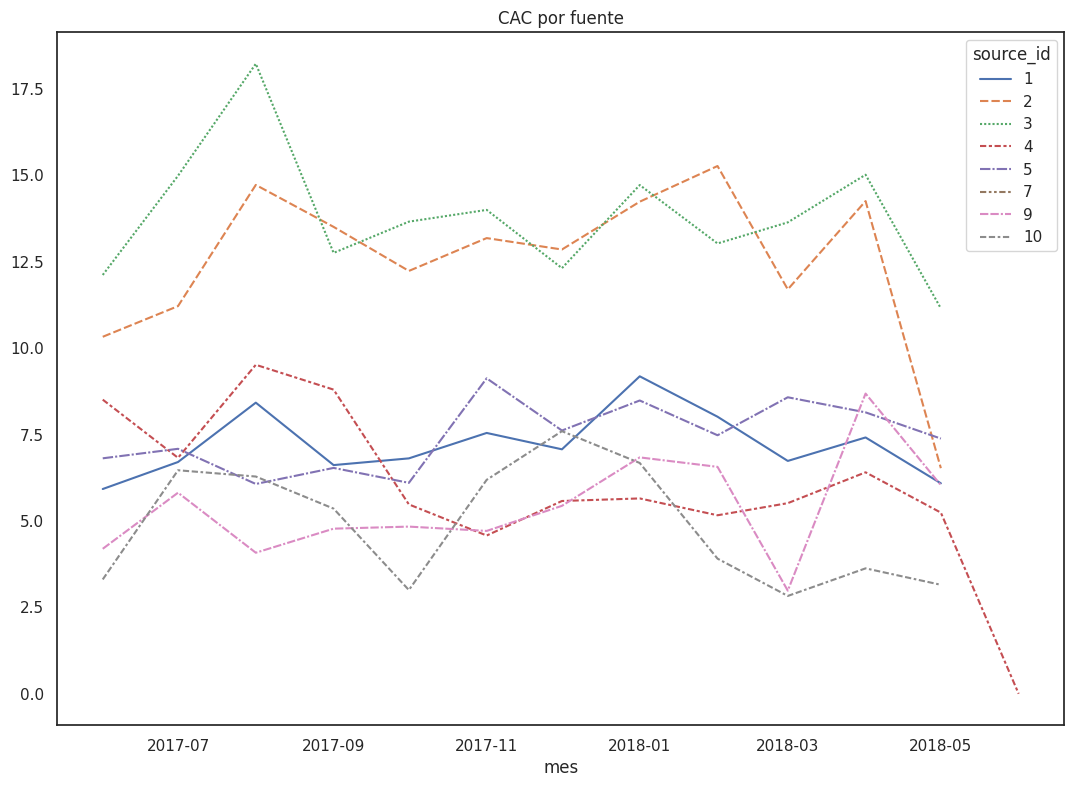

In [95]:
# Graficar el CAC por fuente a lo largo del tiempo
plt.figure(figsize=(13,9))
plt.title('CAC por fuente')
sns.lineplot(data=cac_fuente)
plt.show();

In [96]:
# Agrupar por fuente y calcular el total de clientes, costos y CAC total por cada fuente
CAC_por_mes_fuente.groupby('source_id').sum().sort_values('clientes', ascending=False)

,clientes,costs,CAC
source_id,,,
3,316555,141321.63,165.632917
4,311191,61073.60,77.272488
5,210301,51757.10,89.423257
2,106196,42806.04,150.048815
1,87664,20833.27,86.545286
10,40121,5822.49,58.405501
9,32929,5517.49,64.966699
7,1,0.00,0.000000


**Algunas observaciones**

- El CAC promedio para todas las fuentes está en 9.15 , lo que brinda una referencia general de cuánto se gasta en promedio para adquirir cada cliente. Sin embargo, ciertas fuentes se encuentran por encima y por debajo de este promedio.

- La fuente 3 tiene el CAC total más alto ( 165,63 ), lo que indica que, aunque es una de las fuentes más costosas, atrae la mayor cantidad de clientes (316,555 en total).

- Las fuentes 4 y 5 también presentan CAC altos, pero menores en comparación con la Fuente 3. La fuente 10 y la fuente 9 tienen los CAC más bajos (58.41 y 64.97, respectivamente), lo que sugiere una mayor eficiencia en términos de adquisición por costo.

- La fuente 7 es la única que muestra un CAC de 0.00 , probablemente debido a que no se registraron costos de adquisición asociados a ella en el período analizado. Esto podría indicar una fuente orgánica o de costo muy bajo.

- En el gráfico de CAC por fuente a lo largo del tiempo, es posible observar que las fuentes presentan comportamientos específicos en ciertos meses, lo cual podría estar relacionado con campañas de marketing estacionales o promociones específicas. Las fuentes 2 y 3, por ejemplo, tienden a tener picos de CAC en ciertos meses, lo que indica que podrían estar haciendo campañas intensivas o más costosas en esos períodos.

**¿Cuán rentables eran las inversiones? (ROMI)**

In [97]:
# Seleccionar las columnas 'mes' y 'CAC' del DataFrame 'costo_de_adquisicion_clientes'
cac_por_mes_ROI=costo_de_adquisicion_clientes[['mes','CAC']]
# Renombrar columnas para facilitar la fusión con otros datos
cac_por_mes_ROI.columns=['primera_orden_mes','CAC']
# Fusionar los datos de LTV con CAC para calcular el retorno de inversión (ROI)
ROI=ltv_cohorte.merge(cac_por_mes_ROI,on=['primera_orden_mes'],how='left')
# Visualizar las primeras filas del DataFrame para verificar la fusión
ROI.head()

,primera_orden_mes,mes,revenue,tamaño_cohorte,age,ltv,CAC
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414,8.905091
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329,8.905091
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637,8.905091
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671,8.905091
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531,8.905091


In [98]:
# Calcular el ROI dividiendo el LTV entre el CAC
ROI['ROI']=ROI['ltv']/ROI['CAC']
# Crear una tabla pivote para ver el ROI acumulado por cada cohorte
roi_piv = ROI.pivot_table(
    index='primera_orden_mes', columns='age', values='ROI').cumsum(axis=1).round(2)

In [99]:
# Visualizar la tabla pivote de ROI acumulado
roi_piv

age,0,1,2,3,4,5,6,7,8,9,10,11
primera_orden_mes,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,NaN
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.70,0.74,0.77,0.78,NaN,NaN
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.30,1.38,1.40,1.42,NaN,NaN,NaN
2017-10-01,0.60,0.66,0.68,0.70,0.72,0.74,0.75,0.76,NaN,NaN,NaN,NaN
2017-11-01,0.55,0.60,0.62,0.65,0.67,0.68,0.69,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.54,0.57,0.68,0.80,0.84,0.87,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.42,0.45,0.48,0.49,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.46,0.49,0.50,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


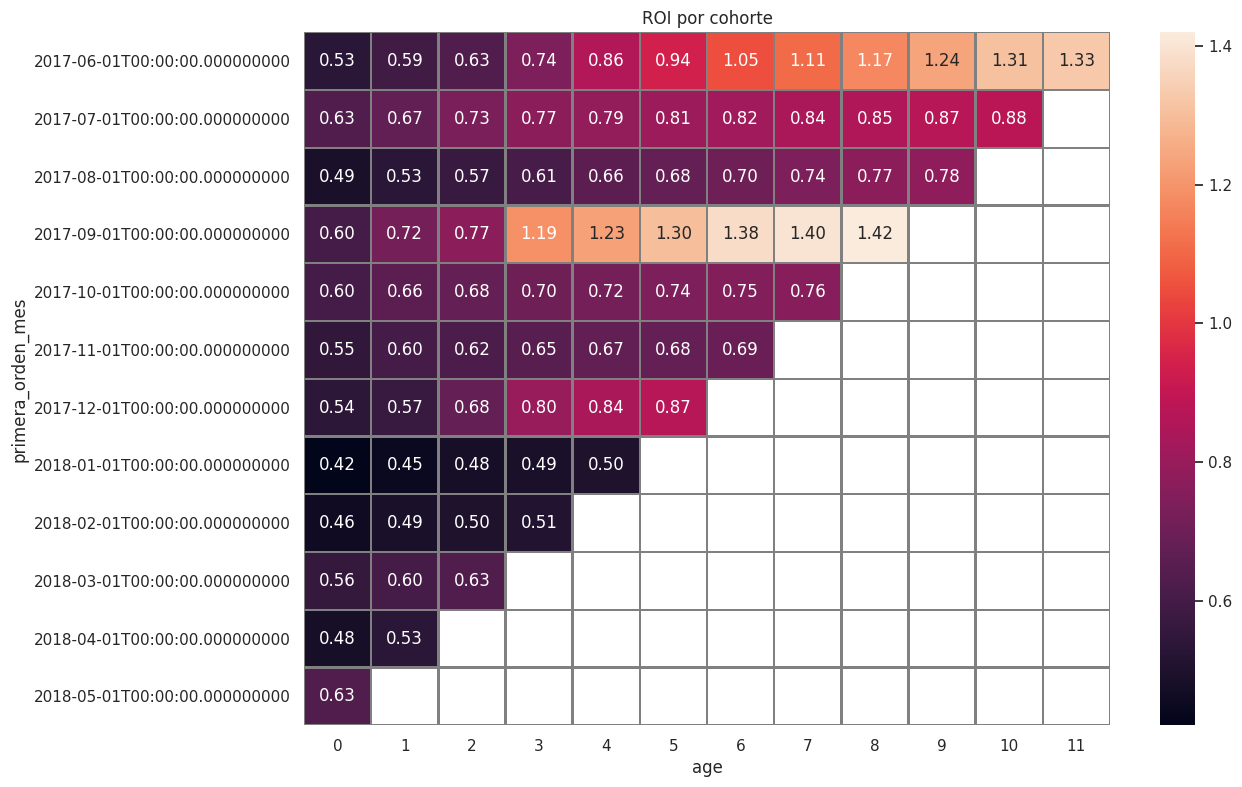

In [100]:
# Configurar el tamaño de la figura para el gráfico de calor
plt.figure(figsize=(13,9))
plt.title('ROI por cohorte')
# Crear un mapa de calor del ROI acumulado por cohorte y edad
sns.heatmap(roi_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey')
#Mostrar el gráfico
plt.show()

In [101]:
# Agrupar el total de ingresos por la primera fuente de cada usuario
ganancia_por_fuente=ordenes.groupby('primera_fuente').agg({'revenue':'sum'}).reset_index()
# Ordenar las fuentes por ingresos en orden descendente
ganancia_por_fuente.sort_values('revenue', ascending=False)

,primera_fuente,revenue
3,4,56696.83
2,3,54511.24
4,5,52624.02
1,2,46923.61
0,1,31090.55
6,9,5759.40
7,10,4450.33
5,7,1.22


In [102]:
# Convertir 'primera_fuente' en 'source_id' y asegurar un tipo de datos consistente
ganancia_por_fuente['source_id'] = ganancia_por_fuente['primera_fuente'].astype(int)
# Eliminar la columna original 'primera_fuente'
ganancia_por_fuente = ganancia_por_fuente.drop('primera_fuente', axis=1)

In [103]:
# Fusionar los datos de CAC con los ingresos para calcular el Retorno sobre la Inversión de Marketing (ROMI)
romi_df = CAC_por_mes_fuente.merge(ganancia_por_fuente, on= "source_id")
# Visualizar el DataFrame de ROMI para verificar la fusión
romi_df

,mes,source_id,clientes,dt,costs,CAC,revenue
0,2017-06-01,1,190,2017-06-01,75.20,0.395789,31090.55
1,2017-06-01,1,190,2017-06-02,62.25,0.327632,31090.55
2,2017-06-01,1,190,2017-06-03,36.53,0.192263,31090.55
3,2017-06-01,1,190,2017-06-04,55.00,0.289474,31090.55
4,2017-06-01,1,190,2017-06-05,57.08,0.300421,31090.55
...,...,...,...,...,...,...,...
2539,2018-05-01,10,130,2018-05-28,21.26,0.163538,4450.33
2540,2018-05-01,10,130,2018-05-29,11.32,0.087077,4450.33
2541,2018-05-01,10,130,2018-05-30,33.15,0.255000,4450.33
2542,2018-05-01,10,130,2018-05-31,17.60,0.135385,4450.33


In [104]:
# Calcular el valor del cliente (LTV) dividiendo los ingresos entre el número de clientes
romi_df['ltv'] = romi_df['revenue']/ romi_df['clientes']
# Calcular el ROMI dividiendo el LTV entre el CAC
romi_df['romi'] = romi_df['ltv']/ romi_df['CAC']

In [105]:
# Visualizar el DataFrame de ROMI para verificar los cálculos
romi_df

,mes,source_id,clientes,dt,costs,CAC,revenue,ltv,romi
0,2017-06-01,1,190,2017-06-01,75.20,0.395789,31090.55,163.634474,413.438165
1,2017-06-01,1,190,2017-06-02,62.25,0.327632,31090.55,163.634474,499.446586
2,2017-06-01,1,190,2017-06-03,36.53,0.192263,31090.55,163.634474,851.096359
3,2017-06-01,1,190,2017-06-04,55.00,0.289474,31090.55,163.634474,565.282727
4,2017-06-01,1,190,2017-06-05,57.08,0.300421,31090.55,163.634474,544.683777
...,...,...,...,...,...,...,...,...,...
2539,2018-05-01,10,130,2018-05-28,21.26,0.163538,4450.33,34.233308,209.328786
2540,2018-05-01,10,130,2018-05-29,11.32,0.087077,4450.33,34.233308,393.138693
2541,2018-05-01,10,130,2018-05-30,33.15,0.255000,4450.33,34.233308,134.248265
2542,2018-05-01,10,130,2018-05-31,17.60,0.135385,4450.33,34.233308,252.859659


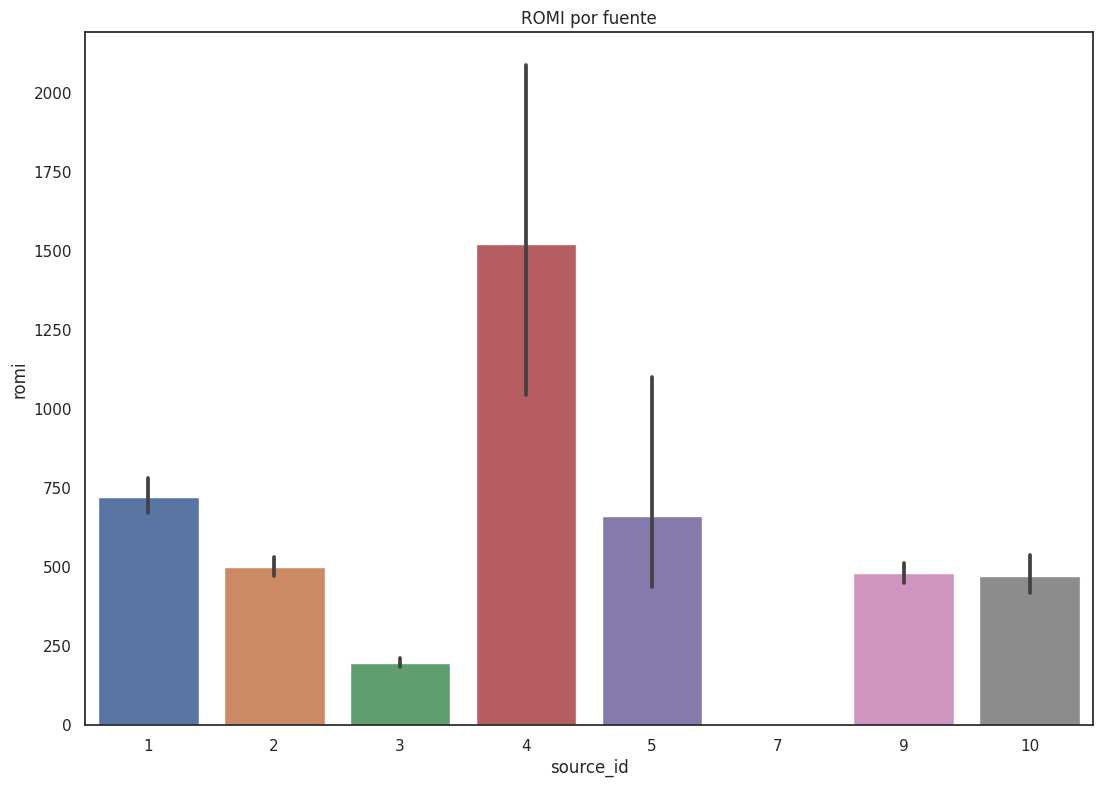

In [106]:
# Configurar y crear un gráfico de barras para visualizar el ROMI por fuente
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI por fuente')
sns.barplot(data=romi_df, x='source_id', y='romi');

**Algunas observaciones:**

1. ROI acumulado por cohorte

* Interpretación del Gráfico : Este gráfico muestra el rendimiento de las cohortes en el tiempo, reflejando cómo los ingresos acumulados en relación con la inversión crecen para cada cohorte específica. Un ROI creciente en el tiempo indica un aumento en la rentabilidad, mientras que una línea plana sugiere que los ingresos ya no crecen de manera significativa respecto a la inversión inicial.

* Patrones Observados : Si las cohortes muestran un crecimiento sostenido en su ROI, esto sugiere una rentabilidad que mejora con el tiempo. Sin embargo, cohortes con crecimiento limitado o estancado pueden señalar una inversión con menor retorno en el largo plazo.

2. ROMI por Fuente

* Interpretación del Gráfico : El gráfico de ROMI por fuente de adquisición ilustra el retorno de la inversión de marketing, evaluando la efectividad de cada fuente. En este caso, fuentes con un ROMI más alto son más efectivas, ya que generan un valor de cliente mayor en relación con el costo de adquisición (CAC).

Análisis de resultados:

La fuente 4 muestra el ROMI más alto, indicando una excelente rentabilidad en comparación con otras fuentes.
La fuente 1 y fuente 5 también tienen un buen ROMI, lo que sugiere que son fuentes de adquisición eficientes.
Fuentes como la 3 , la 9 y la 10 tienen un ROMI significativamente menor, lo que indica que podrían no estar generando un retorno adecuado en comparación con la inversión realizada.

Desviación Estándar en el ROMI : La presencia de barras de error en el gráfico indica variabilidad en los retornos dentro de cada fuente, lo que puede deberse a fluctuaciones en los ingresos generados o en los costos asociados a cada fuente. Esto podría significar que algunas fuentes tienen un rendimiento menos predecible, mientras que otras muestran un ROMI más consistente.

# Paso 3. Conclusión:

Para dar conclusión, sugiero un enfoque basado en el ROMI, que es el Retorno sobre la Inversión en Marketing, y en los ingresos totales generados por cada fuente.

* Recomendaciones para Inversión en Fuentes:

Fuente 4:
Tiene el ROMI más alto, lo que indica que el valor que genera por cliente en relación con su costo de adquisición es notable positivo. Esto la convierte en la fuente más rentable.

Estrategia: Recomendaría asignar una mayor porción del presupuesto a esta fuente para aprovechar su alta rentabilidad. Esto ayudará a maximizar el retorno general de la inversión en marketing.

Fuentes 1 y 5:
Aunque sus ROMI son más bajos que los de la Fuente 4, estas fuentes aún muestran una rentabilidad considerable y contribuyente con ingresos significativos.

Estrategia: Invertir de manera conservadora pero consistente en estas fuentes, ya que han demostrado potencial para generar ingresos adicionales de manera constante.

Fuentes 2 y 3:
Estas fuentes tienen ROMI más bajos y menor volumen de ingresos en comparación con las principales, pero podrían tener potencial en segmentos de clientes específicos.

Estrategia: Reducir la inversión en estas fuentes o considerar estrategias específicas para optimizar su rendimiento. Invertir en ellas solo si existen campañas enfocadas en maximizar su efectividad con un CAC ajustado.

Fuentes 7, 9 y 10:
Presentan los ROMI más bajos y generan pocos ingresos en comparación con otras fuentes.
Estrategia : Es recomendable evitar una inversión significativa en estas fuentes, ya que su rentabilidad es baja. Solo se justificaría una inversión mínima para probar mejoras potenciales, si el presupuesto lo permite.

**Conclusión general:**
Las recomendaciones se fundamentan en la relación ROMI-CAC , priorizando las fuentes que generan un mayor valor (LTV) por el costo invertido. Este enfoque permitirá una asignación eficiente del presupuesto, maximizando el retorno de la inversión y optimizando el gasto en marketing.

Este proyecto de optimización de marketing para Showz se centra en entender el comportamiento de los usuarios, la eficacia de las fuentes de adquisición y el retorno de inversión de las campañas para maximizar la rentabilidad de la empresa. A lo largo del análisis, se exploran aspectos clave como el comportamiento de visita de los usuarios, el proceso de conversión de ventas, el LTV de los clientes, el CAC y el ROMI. A continuación, se resumen los hallazgos y conclusiones más importantes:

1. Comportamiento de Visitas de Usuarios
Frecuencia y Patrones de Uso : Se observará que los usuarios tienden a tener múltiples visitas, con un promedio de 10.7 minutos por sesión y un alto volumen de sesiones breves, indicando que muchos usuarios navegan rápidamente por la plataforma.
Retención de Usuarios : La mayoría de los usuarios realizan su primera compra el mismo día de su primera sesión (72,2%), mientras que algunos necesitan más tiempo para convertir. Este dato es clave para diseñar estrategias de retención, ya que se identifican patrones de usuarios que regresan periódicamente.
Recomendación : Focalizarse en mejorar la experiencia inicial de navegación y compra, además de implementar campañas de remarketing para usuarios que no se conviertan en la primera sesión.
2. Conversión y Ciclo de Compras
Tiempo hasta la Conversión : Aunque la mayoría convierte el primer día, existe una gran variabilidad en los tiempos de conversión, con un promedio de 16,7 días y una gran desviación estándar.
Recomendación : Aprovechar la información de tiempos de conversión para programar campañas de retargeting y mensajes personalizados, optimizando así el tiempo de conversión y adaptando el mensaje al tipo de usuario según su comportamiento de compra.
3. Análisis de LTV y CAC
Valor del Cliente (LTV) : Las fuentes con los LTV más altos generan un retorno superior, maximizando el valor por cliente adquirido.
Costo de Adquisición de Clientes (CAC) : Se detectaron variaciones significativas en el CAC entre fuentes, con algunas fuentes mostrando un CAC elevado pero sin el retorno suficiente.
Recomendación : Enfocarse en las fuentes de adquisición con el LTV más alto y optimizar el CAC en fuentes menos rentables, evaluando el costo en relación con el valor generado.
4. Retorno sobre la Inversión en Marketing (ROMI) que ya se explicó.

Este análisis integral permite a Showz tener una visión más clara de dónde y cómo invertir su presupuesto de marketing para maximizar el retorno. Las principales recomendaciones son:

- Invertir más en fuentes con alto ROMI y LTV (como la Fuente 4) y reducir la inversión en fuentes de bajo rendimiento.

- Optimizar la experiencia inicial de los usuarios para mejorar las tasas de conversión el primer día y considerar campañas de remarketing para quienes no se convierten en su primera sesión.

- Diseñar estrategias de retargeting basadas en el tiempo promedio hasta la conversión para retener usuarios de manera efectiva y mejorar su ciclo de vida dentro de la plataforma.

Estas acciones contribuirán a maximizar la rentabilidad del presupuesto de marketing, optimizando el CAC y generando un mayor LTV en los usuarios adquiridos, lo que a su vez impulsará el crecimiento sostenido de Showz.